['0.4000, 0.4439;', '0.2439, 0.1463;', '0.1707, 0.2293;', '0.2293, 0.7610;', '0.5171, 0.9414;', '0.8732, 0.6536;', '0.6878, 0.5219;', '0.8488, 0.3609;', '0.6683, 0.2536;', '0.6195, 0.2634;']
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]
[[0.67238087 0.74704565]
 [0.09890834 0.27037178]
 [0.53517444 0.94377328]
 [0.70505595 0.04160235]
 [0.91296539 0.38243519]
 [0.33323607 0.34453502]
 [0.64960675 0.53713397]
 [0.79838878 0.0185895 ]
 [0.04316786 0.68442648]
 [0.90103979 0.35822287]]
[[ 10.1203495    5.80397089]
 [ -8.76835893   0.26502121]
 [  4.32146935   8.67735832]
 [  5.4851441   -8.24507895]
 [  8.15287443  -7.27561465]
 [ -8.57026212  -3.71249665]
 [  3.98554168  -9.64380734]
 [  1.7387876

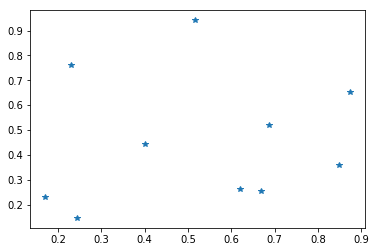

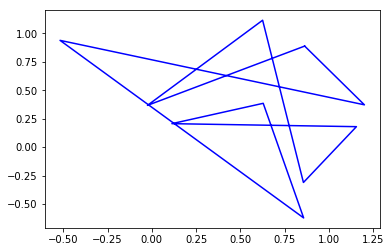

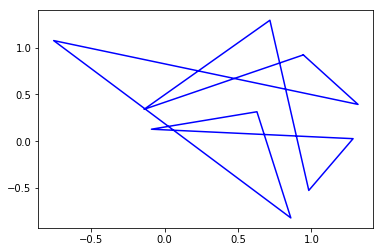

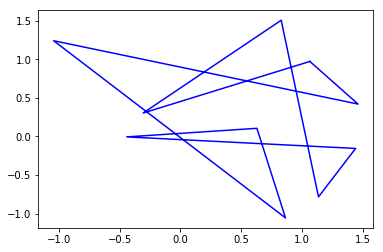

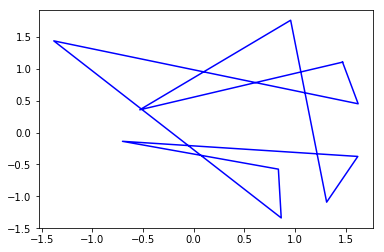

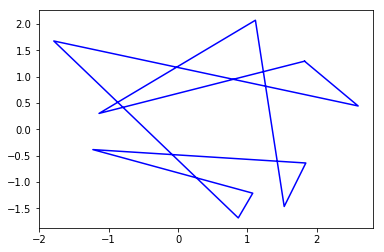

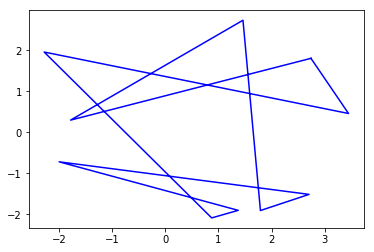

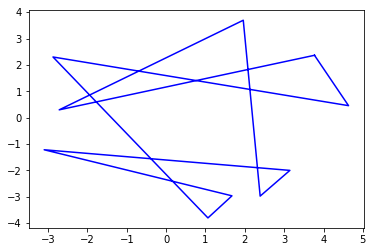

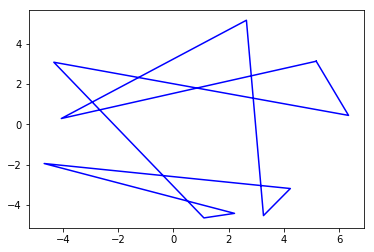

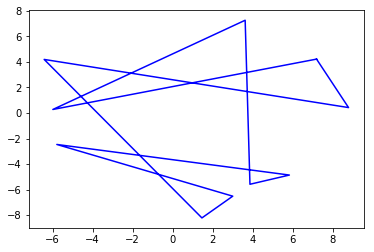

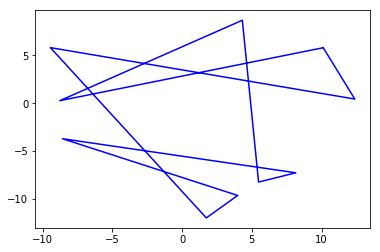

In [4]:
"""1.Input 2, output 10
    2.Neighbourhood is circular
    3. Start with neighbourhood ==2 and go to 1 and then to 0
    4. 
"""

from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

def load_cities():
    with open("data_lab2/cities.dat") as f:
        rows = f.read().split("\n")[0:-1]
        print(rows)
        rows = [ row[:-1].split(", ") for row in rows ]
        rows = np.array(rows, dtype=float)
        return rows
    
n_neurons = 10
epochs = 10#20 epochs
eta  = 0.2
num_of_neighbours = 2
#use a weight matrix 100x84 init with random number 0 <r<1
w = np.random.rand(10, 2)
#Each row contains the coordinates of one city (value between zero and one).
#cities = np.genfromtxt('data_lab2/cities.dat',delimiter =',')

#cities = np.genfromtxt('data_lab2/cities.dat',dtype=None,delimiter =',',encoding=None)

cities = load_cities()
plt.plot(cities[:,0],cities[:,1],'*')

print(cities)
x = cities.reshape((10,2))
print(x)
print(w)

for n in range(epochs):
    for j, row in enumerate(x):
        #print(row)
        #print("j",j)
        hmm = w - row
        #print(hmm)
        min_dist = 100000
        index_of_min = 0
        for i,weight_row in enumerate(hmm):
            #print(weight_row)
            distance = np.linalg.norm(weight_row)
            
            
            if distance < min_dist:
                #print(min_dist)
                min_dist = distance
                index_of_min = i
        #print(w[index_of_min,:] + eta*(w[index_of_min,:]-row))
        #update weights- always update the actual row
        w[index_of_min,:] = w[index_of_min,:] + eta*(w[index_of_min,:]-row)
        #Update the neighbours
        neighbour_distances = np.zeros(10)
        for k, neighbour in enumerate(x):
            distance = np.linalg.norm(row-neighbour)
            #print("k",k)
            if j != k:
                #print("hej")
                n_index =k
                #print(n_index)
                neighbour_distances[n_index] = distance
                
                
        sorted_indexes = np.argsort(neighbour_distances)
        #print(sorted_indexes)
        for index in range(num_of_neighbours+1):
            #print(sorted_indexes[index])
            if j != index:
                #print(sorted_indexes[index])
                w[sorted_indexes[index],:] = w[sorted_indexes[index],:] + eta*(w[sorted_indexes[index],:]-row)
            
    #print(num_of_neighbours)
    if n < epochs/2:
        num_of_neighbours = 2
    elif n < epochs/1.5:
        num_of_neighbours = 1
    else:
        num_of_neighbours = 0
    tmp = np.vstack([w[:,:],w[0,:]])
    plt.figure()
    plt.plot(tmp.T[0],tmp.T[1],color='blue', label = 'The tour')
print(w)
#print the animals
winners = np.zeros(10)
for j,row in enumerate(x):
    hmm = w-row
    min_dist = 100000
    index_of_min = 0
    for i,weight_row in enumerate(hmm):
        distance = np.linalg.norm(weight_row)
        #print(i)

        if distance < min_dist:
            min_dist = distance
            index_of_min = i
            #print(min_dist)
            
          
    winners[j] = index_of_min
sorted_cities = np.zeros((10,2))

for i,winner in enumerate(winners):
    #print(i)
    #print(winner)
    #print(int(winner))
    sorted_cities[i,:] = cities[int(winner),:]
print(sorted_cities)